# PPT → Markdown (v3: Better Text Joining + Tables + Equations)

**Source**: `[12차시] LV3_3-2 모수적 모델_0904_수정.pptx`

개선 사항:
- **폰트/스타일로 분리된 run들을 문장 단위로 매끄럽게 연결**
- 줄바꿈(br) 보존, 불필요한 공백 정리, 소프트 하이픈 제거
- bullet(기본) 감지 후 접두사 적용
- 기존 이미지/테이블/수식/헤더 로직 그대로 유지

### 3-2. 모수적 모델

#### 가중치 기반 모델(Weight-Based Model)

- 특성(Feature)에 중요도를 나타내는 가중치를 곱하고 이를 합하여 출력(Output)을 생성하는 구조의 모델
> Ex) 선형회귀 모델
>
> $\hat{𝒚}=𝒇(\mathbf{𝐱})=\mathbf{𝐰}^𝑻\mathbf{𝐱}+𝒃$


#### 인공 신경망

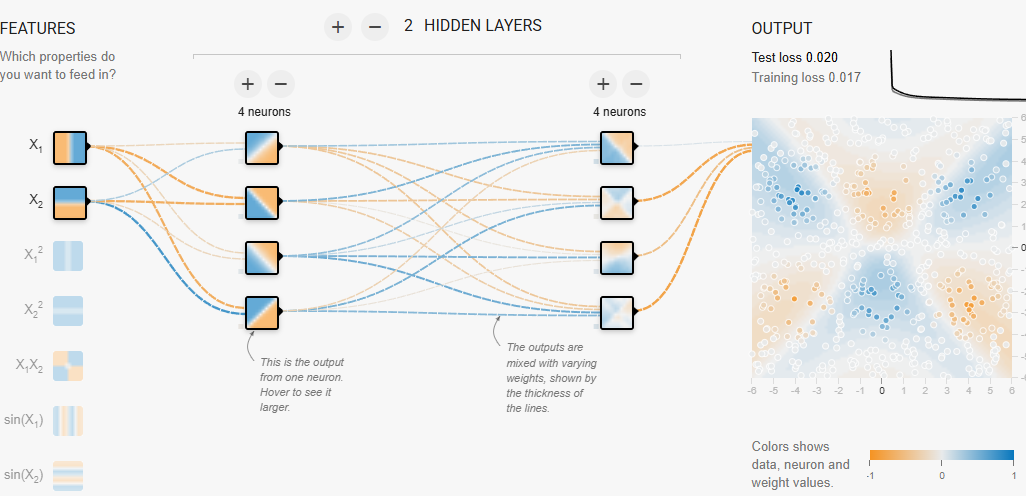

출처 : https://playground.tensorflow.org/

#### 학습
|   | 수식 기반 추정<br/>(Closed-Form Solution Estimation) | 최적화 알고리즘 기반 추정<br/>(Optimization-Based Estimation) |
| --- | --- | --- |
| 기본 개념 | 수식으로 가중치를 직접 계산 | 손실이 감소하는 방향으로 반복적 가중치 갱신 |
| 대표 알고리즘 | 정규 방정식 | 경사 하강법 |
| 장점 | 고정된 결과를 얻을 수 있음 | 높은 범용성<br/>점진적 학습 가능 |
| 단점 | 사용할 수 있는 모델이 제한적임 | 최적화 알고리즘 튜닝 필요<br/>초기값 설정에 따라 성능 차이가 있음 |
| 활용 모델 | 선형회귀 모델, Ridge 회귀 모델, … | 선형회귀 모델, 인공신경망, … |


#### 경사하강법(Gradient Descent)
- 목적 함수의 기울기를 따라 모수를 갱신하는 반복적 최적화 알고리즘
- 반복이 진행됨에 따라 목적 함수가 최적값에 가까워짐

> $\mathbf{\theta}=\mathbf{\theta}−\eta\nabla_{\mathbf{\theta}}𝐽(\theta)$
>
> $J(\mathbf{\theta})$: 목적 함수(Objective Function)
>
> $\eta$: 학습률(Learning Rate)

#### 선형회귀 모델 학습에 경사하강법 적용

$\hat{y}_i = \mathbf{w}^T\mathbf{x}_i + b$

$J = \frac{1}{N}\sum_{i=1}^{N} (y_i - \hat{y}_i)^2 \longleftarrow \text{MSE를 목적함수로 사용}$

$\nabla_{\mathbf{w}}J = \frac{1}{N}\sum_{i=1}^{N} \mathbf{x}_i(y_i - \hat{y}_i) = \frac{1}{N}X^T(\mathbf{y} - \hat{\mathbf{y}}) \quad \frac{\partial J}{\partial b} = \frac{1}{N}\sum_{i=1}^{N} (y_i - \hat{y}_i)$

$\mathbf{w} = \mathbf{w} - \eta\nabla_{\mathbf{w}}J(\mathbf{w})$

$b = b - \eta\frac{\partial J}{\partial b}(b)$

#### 경사하강법(Gradient Descent)의 과정

- 1. 모수 초기화
- 2. 손실과 기울기 계산
- 3. 모수 업데이트
- 4. 종료 조건을 충족 하지 않으면 2단계로 이동

※에폭(Epoch): 학습 데이터를 모두 사용하여 한 번 학습을 완료한 수행 단위


#### 학습률(Learning Rate)
- 적정 수준의 학습을 맞춰 주어야 함
- 너무 크면 불안정, 너무 작으면 느림

> $\mathbf{\theta}=\mathbf{\theta}−\eta\nabla_{\mathbf{\theta}}𝐽(\mathbf{\theta})$


#### 규제(Regularization)

- 모수가 지나치게 커지지 않게 제약을 걸어 주는 방법

- 규제 방식

|   | 규제함수 |
| --- | --- |
| L1 규제<br/>(L1 Regularization) |$\sum_{i=1}^k|\beta_i|$|
| L2 규제<br/>(L2 Regularization) |$\sum_{i=1}^k\beta_i^2$ |

- L1 규제 적용
> 손실함수에 규제 계수와 함께 가산
> 
> EX) $\text{Loss}=\sum_{i=1}^n(y_i-\hat{y}_i)^2$

- L1 규제 적용
$Loss = \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 + \alpha \sum_{i=1}^{k} |\beta_i|$

- L2 규제 적용
$Loss = \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 + \lambda \sum_{i=1}^{k} \beta_i^2$

#### L1 규제 vs L2 규제
- L1 규제: 모수를 0 으로 만들게 하는 성질이 강함
- L2 규제: 모수가 지나치게 커지지 않게 만들면서, 완전히 0 이 되지는 않게 함


|  | 단일 변수 규제함수 | 1차 도함수 |
|---|---|---|
| L1 규제<br>(L1 Regularization) | $\|\beta_i\|$ | $\begin{cases} if\ \beta_i > 0, 1 \\ if\ \beta_i = 0, \text{미분불가} \\ if\ \beta_i < 0, -1 \end{cases}$ |
| L2 규제<br>(L2 Regularization) | $\beta_i^2$ | $\beta_i$ |

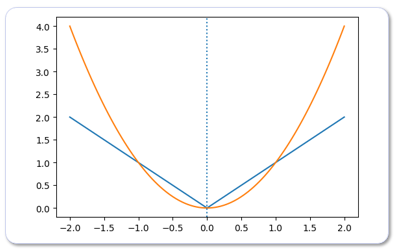

#### 규제가 적용된 선형회귀모델

|  | Ridge | Lasso | Elastic Net |
|---|---|---|---|
| 규제 | L2 규제 | L1 규제 | L1, L2 규제 |
| 손실 함수 | $\sum_{i=1}^{n}(y_i - \hat{y}_i)^2 + \lambda\sum_{i=1}^{k}\beta_i^2$ | $\sum_{i=1}^{n}(y_i - \hat{y}_i)^2 + \alpha\sum_{i=1}^{k}\|\beta_i\|$ | $\sum_{i=1}^{n}(y_i - \hat{y}_i)^2 + \alpha\sum_{i=1}^{k}\|\beta_i\| + \lambda\sum_{i=1}^{k}\beta_i^2$ |
| 수식 기반 추정 | $(X^TX - \lambda I)^{-1}X^Ty$ | 불가 | 불가 |
| 효과 | 안정화, 분산 감소, 다중공선성 완화 | 변수 선별 | Ridge + Lasso |

#### 장단점
- 입력 변수와 출력 변수의 관계가 정의한 함수와 부합
> Yes: 높은 일반화 성능, 구조의 규칙성에 의해 효율적인 연산
> No: 일반화 성능 저하, 성능 향상을 위한 특성 엔지니어링 필요

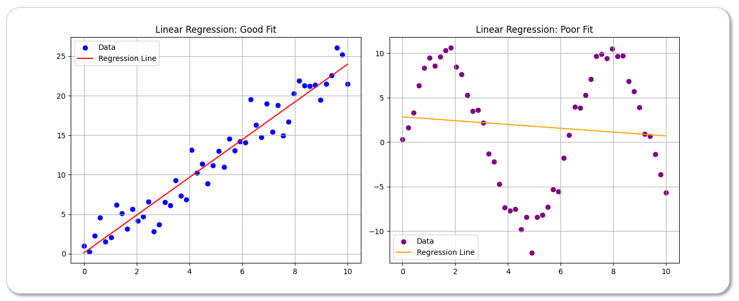

### Slide 14: (Untitled)

- 나이브 베이즈(Naive Bayes)
- 나이브 베이즈
- 입력 변수들이 서로 독립(Independent)이라는 가정하에
- 베이즈 정리를 활용해 사후 확률을 계산하고 이를 기반으로 분류하는 모델
- 2

**Equation 14.1**
$$
𝑦=argmax𝑐∈𝐶𝑃(𝑦)𝑖=1𝑛𝑃𝑋𝑖=𝑥𝑖𝑦𝑖=𝑐
$$

**Equation 14.2**
$$
𝑦=argmax𝑐∈𝐶𝑃(𝑦)𝑖=1𝑛𝑃𝑋𝑖=𝑥𝑖𝑦𝑖=𝑐
$$

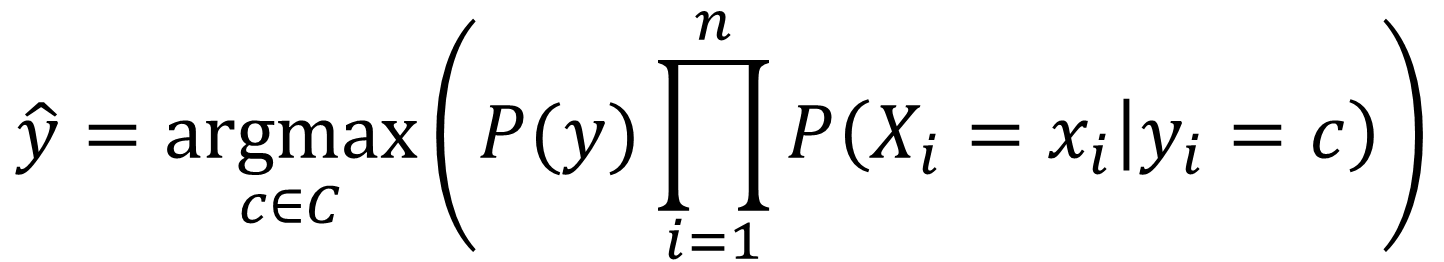
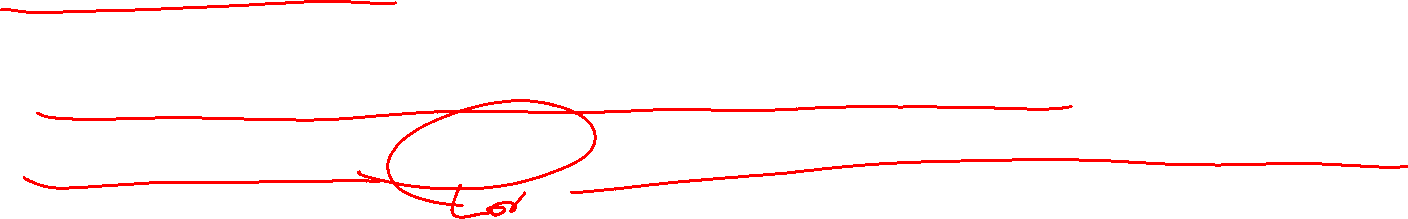


### Slide 15: (Untitled)

- 나이브 베이즈(Naive Bayes)
- 나이브 베이즈(Naive Bayes) 유도과정
- 2
- underflow 에 대응, log 를 취함
- 입력 변수들이 독립이라는 가정,
- Bayes 룰,

**Equation 15.1**
$$
𝑃𝑦=𝑐𝑋1=𝑥1,…,𝑋𝑘=𝑥𝑘=𝑖=1𝑛𝑃𝑋𝑖=𝑥𝑖𝑦=𝑐𝑃𝑋1=𝑥1,…,𝑋𝑘=𝑥𝑘𝑃(𝑦=𝑐)
$$

**Equation 15.2**
$$
𝑦=argmax𝑐∈𝐶𝑃(𝑦=𝑐)𝑖=1𝑛𝑃𝑋𝑖=𝑥𝑖𝑦=𝑐
$$

**Equation 15.3**
$$
𝑦=argmax𝑐∈𝐶ln𝑃𝑦=𝑐+𝑖=1𝑛ln⁡(𝑃𝑋𝑖=𝑥𝑖𝑦=𝑐
$$

**Equation 15.4**
$$
𝑃𝑦=𝑐𝑋1=𝑥1,…,𝑋𝑘=𝑥𝑘=𝑃𝑋1=𝑥1,…,𝑋𝑘=𝑥𝑘|𝑦=𝑐𝑃(𝑋1=𝑥1,…,𝑋𝑘=𝑥𝑘)𝑃𝑦=𝑐
$$

**Equation 15.5**
$$
𝑃𝑋1=𝑥1,…,𝑋𝑘=𝑥𝑘|𝑦=𝑐=𝑖=1𝑛𝑃(𝑋𝑖=𝑥𝑖|𝑦=𝑐)
$$

**Equation 15.6**
$$
𝑃𝑦=𝑐𝑋1=𝑥1,…,𝑋𝑘=𝑥𝑘=𝑖=1𝑛𝑃𝑋𝑖=𝑥𝑖𝑦=𝑐𝑃𝑋1=𝑥1,…,𝑋𝑘=𝑥𝑘𝑃(𝑦=𝑐)
$$

**Equation 15.7**
$$
𝑦=argmax𝑐∈𝐶𝑃(𝑦=𝑐)𝑖=1𝑛𝑃𝑋𝑖=𝑥𝑖𝑦=𝑐
$$

**Equation 15.8**
$$
𝑦=argmax𝑐∈𝐶ln𝑃𝑦=𝑐+𝑖=1𝑛ln⁡(𝑃𝑋𝑖=𝑥𝑖𝑦=𝑐
$$

**Equation 15.9**
$$
𝑃𝑦=𝑐𝑋1=𝑥1,…,𝑋𝑘=𝑥𝑘=𝑃𝑋1=𝑥1,…,𝑋𝑘=𝑥𝑘|𝑦=𝑐𝑃(𝑋1=𝑥1,…,𝑋𝑘=𝑥𝑘)𝑃𝑦=𝑐
$$

**Equation 15.10**
$$
𝑃𝑋1=𝑥1,…,𝑋𝑘=𝑥𝑘|𝑦=𝑐=𝑖=1𝑛𝑃(𝑋𝑖=𝑥𝑖|𝑦=𝑐)
$$

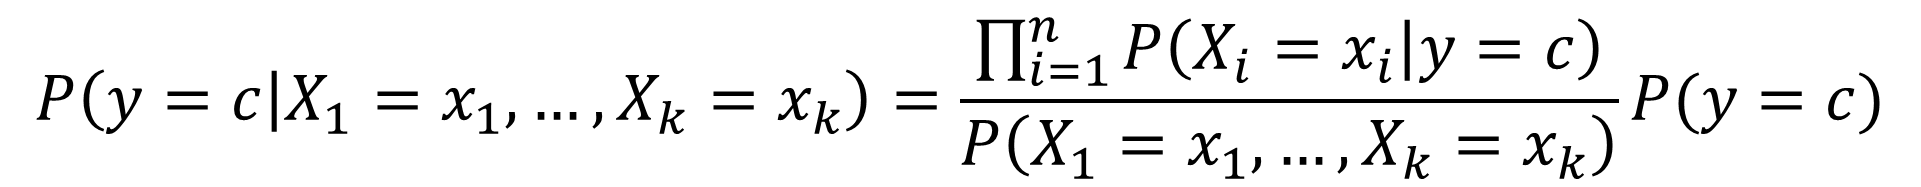
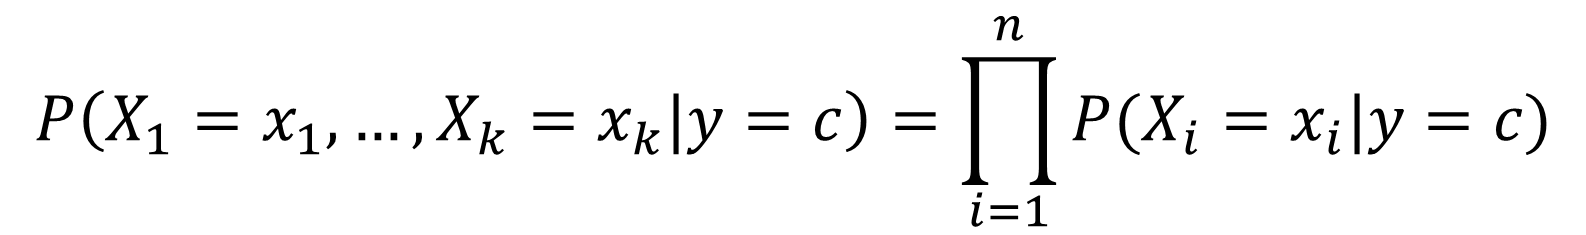
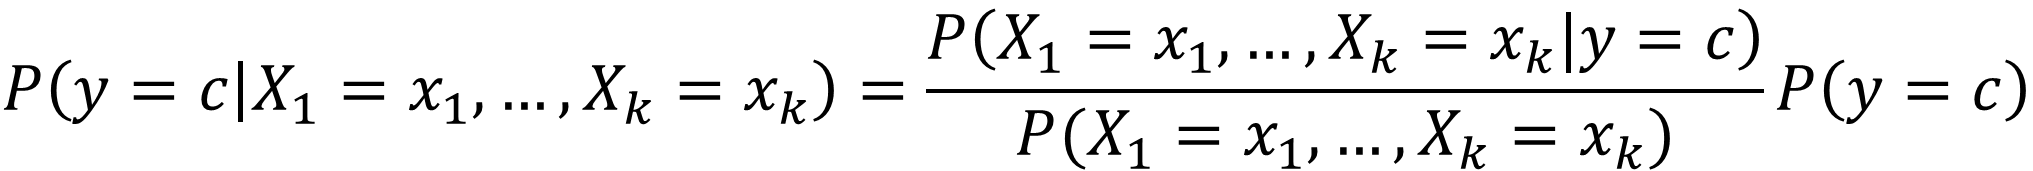
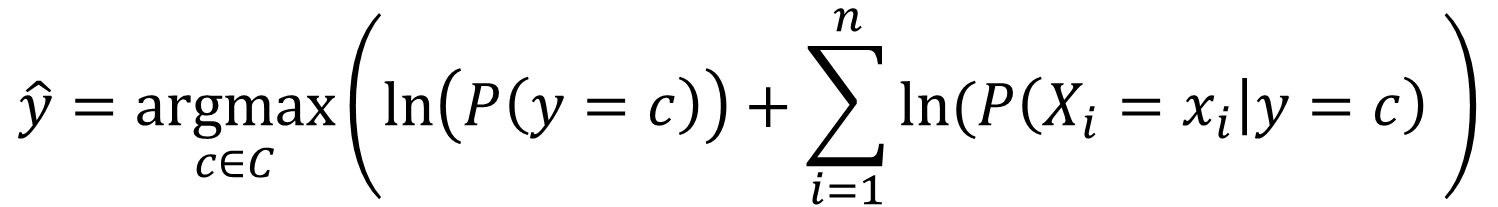
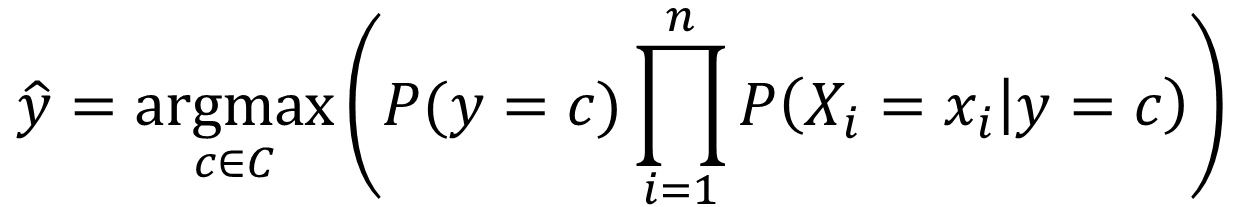
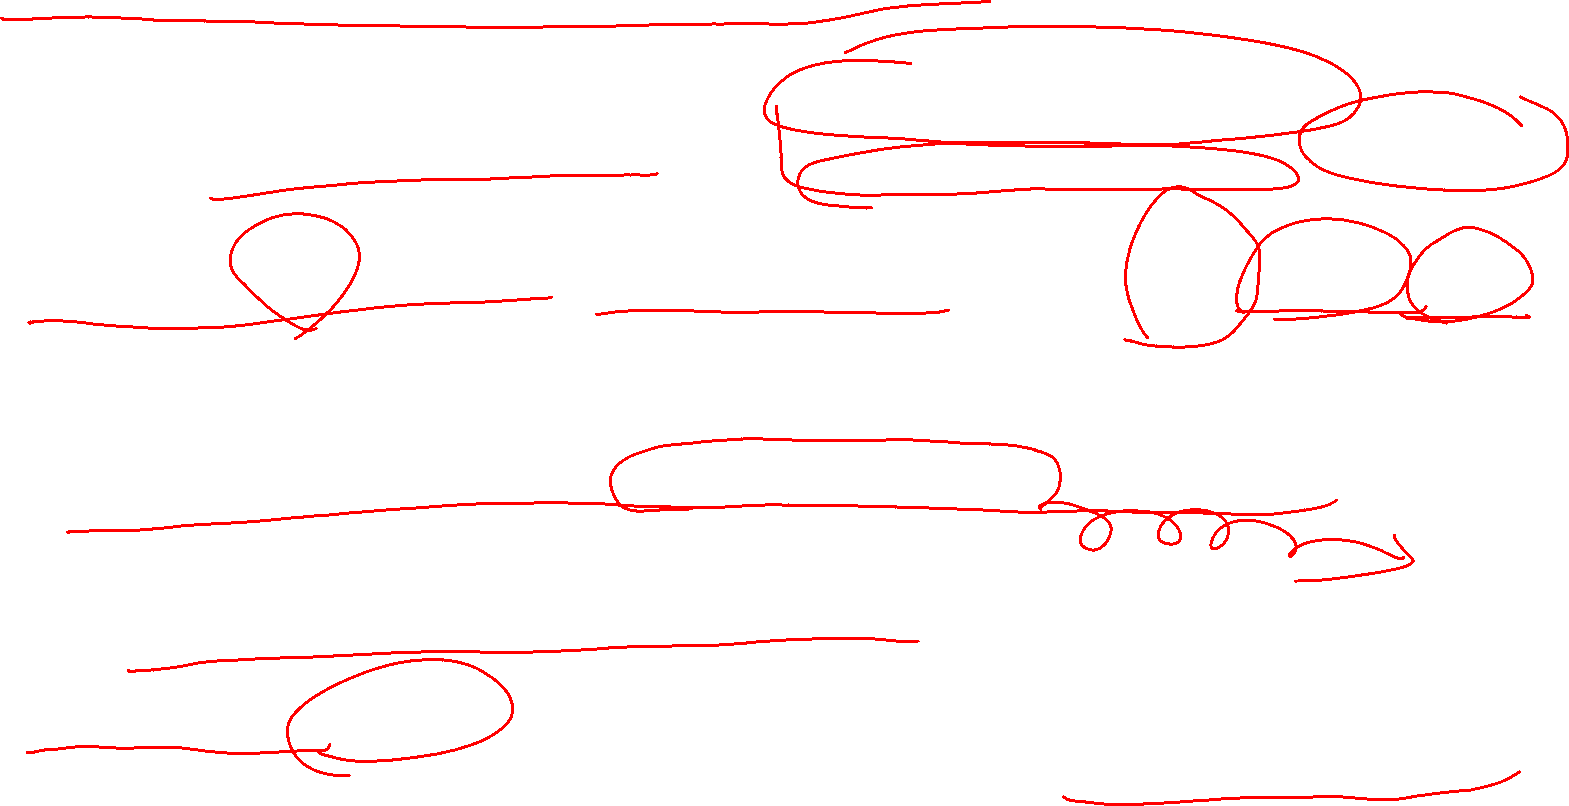


### Slide 16: (Untitled)

- 나이브 베이즈(Naive Bayes)
- 입력 변수 형태
- 조건부 확률의 분포
- Bernoulli NB
- 다수의 이진형 변수
- 베르누이 분포
- Multinomial NB
- k 개 범주의 n 개의 시행에서의 빈도
- 다항 분포
- Gaussian NB
- 연속형
- 가정
- 정규 분포
- 입력 변수 형태
- 조건부 확률의 분포
- Bernoulli NB
- 다수의 이진형 변수
- 베르누이 분포
- Multinomial NB
- k 개 범주의 n 개의 시행에서의 빈도
- 다항 분포
- Gaussian NB
- 정규 분포
- 종류
- 2
- ※ 다항분포
- k 개의 사건 발생 빈도의 분포

**Table 16.1**
|   | 입력 변수 형태 | 조건부 확률의 분포 |
| --- | --- | --- |
| Bernoulli NB | 다수의 이진형 변수 | 베르누이 분포 |
| Multinomial NB | k 개 범주의 n 개의 시행에서의 빈도 | 다항 분포 |
| Gaussian NB | 연속형
가정 | 정규 분포 |

**Table 16.2**
|   | 입력 변수 형태 | 조건부 확률의 분포 |
| --- | --- | --- |
| Bernoulli NB | 다수의 이진형 변수 | 베르누이 분포 |
| Multinomial NB | k 개 범주의 n 개의 시행에서의 빈도 | 다항 분포 |
| Gaussian NB |   | 정규 분포 |

**Equation 16.1**
$$
𝑋𝑖~𝑁𝜇,𝜎2
$$

**Equation 16.2**
$$
𝐱=[𝑥1,𝑥2,…,𝑥𝑘]
$$

**Equation 16.3**
$$
𝑛=𝑖=1𝑘𝑥𝑖
$$

**Equation 16.4**
$$
𝑃𝑋1=𝑥1,…,𝑋𝑘=𝑥𝑘=𝑛!𝑥1!…𝑥𝑘𝑝1𝑥1…𝑝𝑘𝑥𝑘
$$

**Equation 16.5**
$$
𝐱=[𝑥1,𝑥2,…,𝑥𝑘]
$$

**Equation 16.6**
$$
𝑛=𝑖=1𝑘𝑥𝑖
$$

**Equation 16.7**
$$
𝑃𝑋1=𝑥1,…,𝑋𝑘=𝑥𝑘=𝑛!𝑥1!…𝑥𝑘𝑝1𝑥1…𝑝𝑘𝑥𝑘
$$

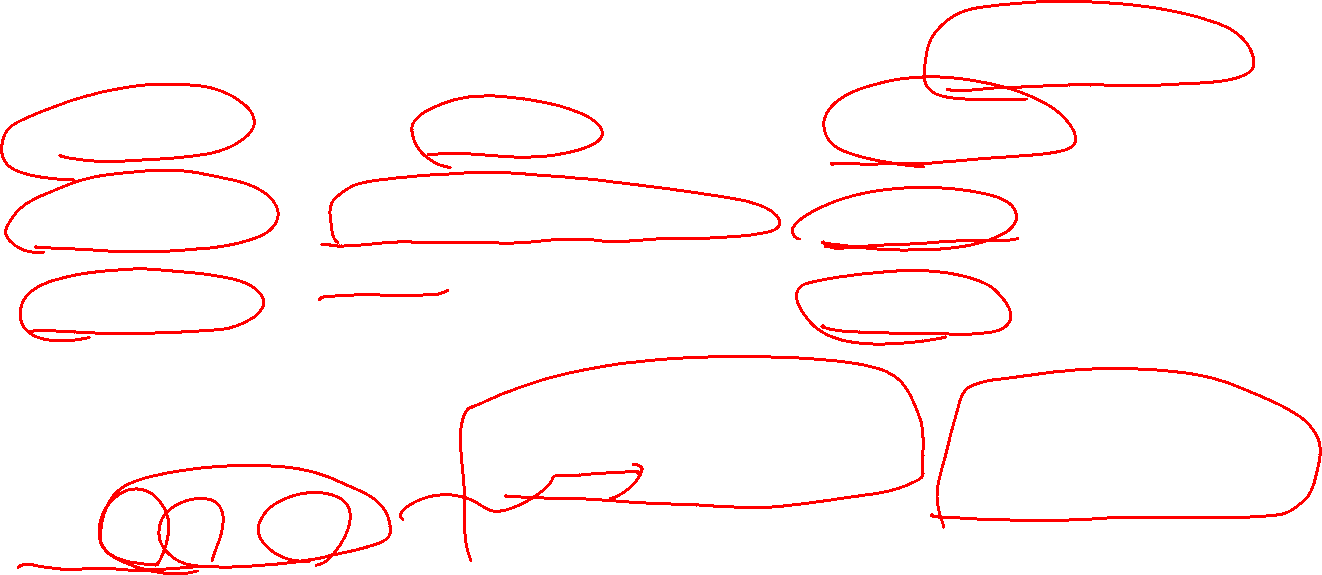
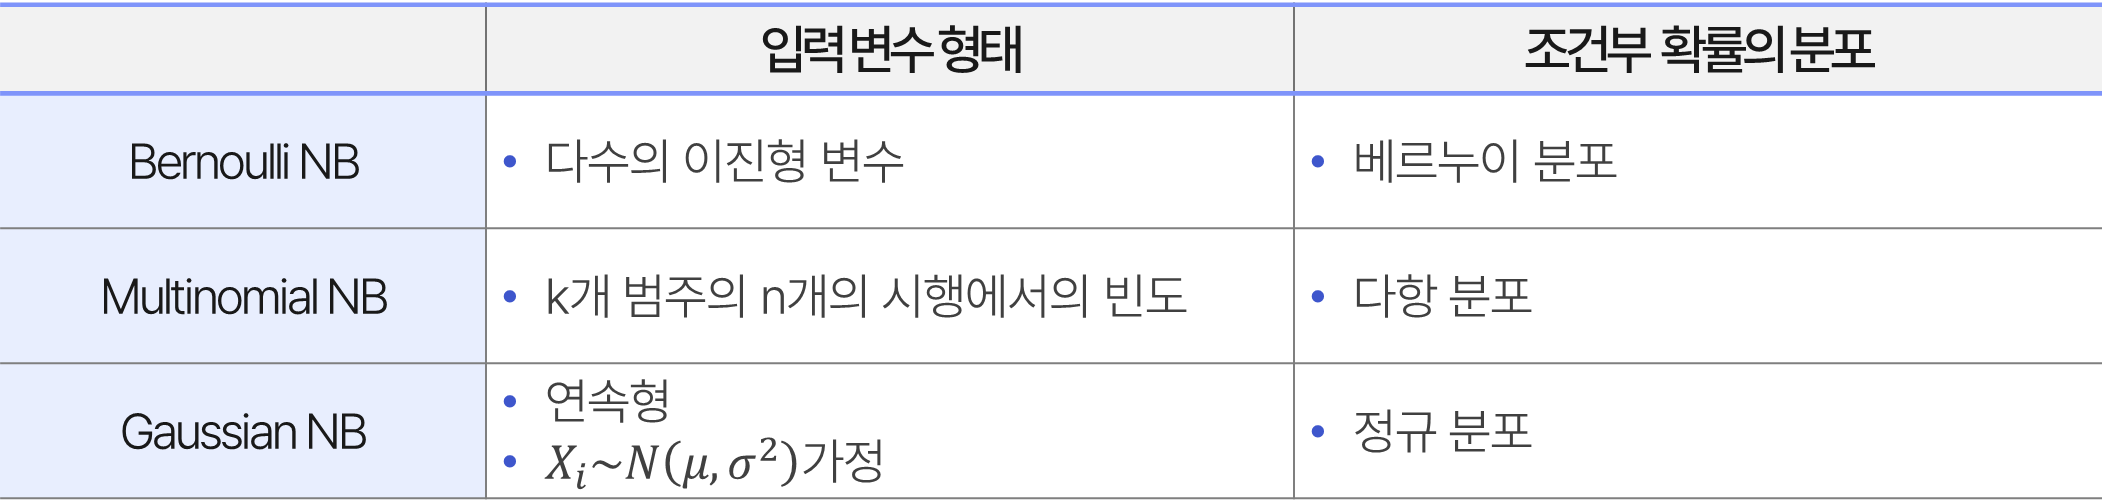
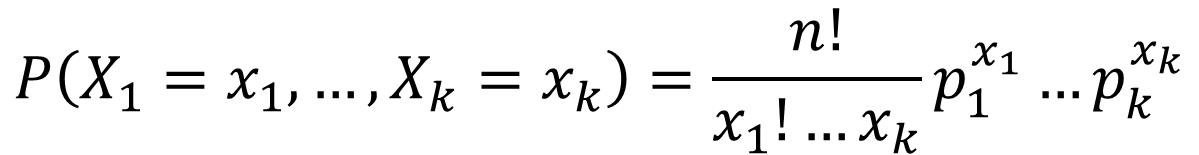
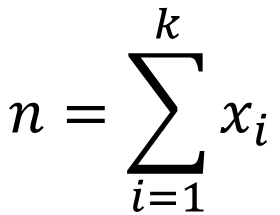
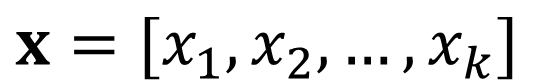


### Slide 17: (Untitled)

- 나이브 베이즈(Naive Bayes)
- 확률 질량(밀도)함수
- 조건부 확률의 분포
- Bernoulli NB
- Multinomial NB
- ,…
- Gaussian NB
- MLE 추정:
- 확률 질량(밀도)함수
- 조건부 확률의 분포
- y 가 c 인 데이터에서,
- 학습
- 조건부 확률
- 사전 확률 𝑃(𝑦=𝑐)
- 2

**Table 17.1**
|   | 확률 질량(밀도)함수 | 조건부 확률의 분포 |
| --- | --- | --- |
| Bernoulli NB |   |   |
| Multinomial NB |   | ,… |
| Gaussian NB |   | MLE 추정: |

**Table 17.2**
|   | 확률 질량(밀도)함수 | 조건부 확률의 분포 |
| --- | --- | --- |
|   |   |   |
|   |   |   |
|   |   |   |

**Equation 17.1**
$$
𝑃(𝑦=𝑐)=𝑖=1𝑛1(𝑦𝑖=𝑐)𝑛
$$

**Equation 17.2**
$$
𝑃(𝑋𝑖=𝑥𝑖|𝑦=𝑐)
$$

**Equation 17.3**
$$
𝑝𝑥𝑖1−𝑝1−𝑥𝑖
$$

**Equation 17.4**
$$
𝑝=𝑖=1𝑛𝑥𝑖+𝛼𝑛+2𝛼
$$

**Equation 17.5**
$$
𝑃(𝑋𝑖1=𝑥𝑖1,…𝑋𝑖𝑘=𝑥𝑖𝑘|𝑦=𝑐)
$$

**Equation 17.6**
$$
(𝑗=1𝑘𝑥𝑖𝑗)!𝑥𝑖1!…𝑥𝑖𝑘𝑝1𝑥𝑖1…𝑝𝑘𝑥𝑖𝑘
$$

**Equation 17.7**
$$
𝑝𝑘=𝑖=1𝑛𝑥𝑖1+𝛼𝑖=1𝑛𝑗=1𝑘𝑥𝑖𝑗+𝑘𝛼
$$

**Equation 17.8**
$$
𝑃(𝑋𝑖=𝑥𝑖|𝑦=𝑐)
$$

**Equation 17.9**
$$
12𝜋𝜎𝑖2𝑒𝑥𝑖−𝜇𝑖22𝜎2
$$

**Equation 17.10**
$$
𝜇𝑖=1𝑛𝑖=1𝑛𝑥𝑖, 𝜎𝑖2=1𝑛𝑖=1𝑛𝑥𝑖−𝜇𝑖2𝑛
$$

**Equation 17.11**
$$
𝑃(𝑋𝑖=𝑥𝑖|𝑦=𝑐)
$$

**Equation 17.12**
$$
𝑝𝑥𝑖1−𝑝1−𝑥𝑖
$$

**Equation 17.13**
$$
𝑝=𝑖=1𝑛𝑥𝑖+𝛼𝑛+2𝛼
$$

**Equation 17.14**
$$
𝑃(𝑋𝑖1=𝑥𝑖1,…𝑋𝑖𝑘=𝑥𝑖𝑘|𝑦=𝑐)
$$

**Equation 17.15**
$$
(𝑗=1𝑘𝑥𝑖𝑗)!𝑥𝑖1!…𝑥𝑖𝑘𝑝1𝑥𝑖1…𝑝𝑘𝑥𝑖𝑘
$$

**Equation 17.16**
$$
𝑃(𝑋𝑖=𝑥𝑖|𝑦=𝑐)
$$

**Equation 17.17**
$$
12𝜋𝜎𝑖2𝑒𝑥𝑖−𝜇𝑖22𝜎2
$$

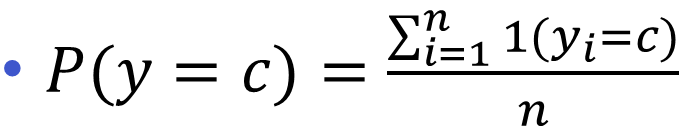
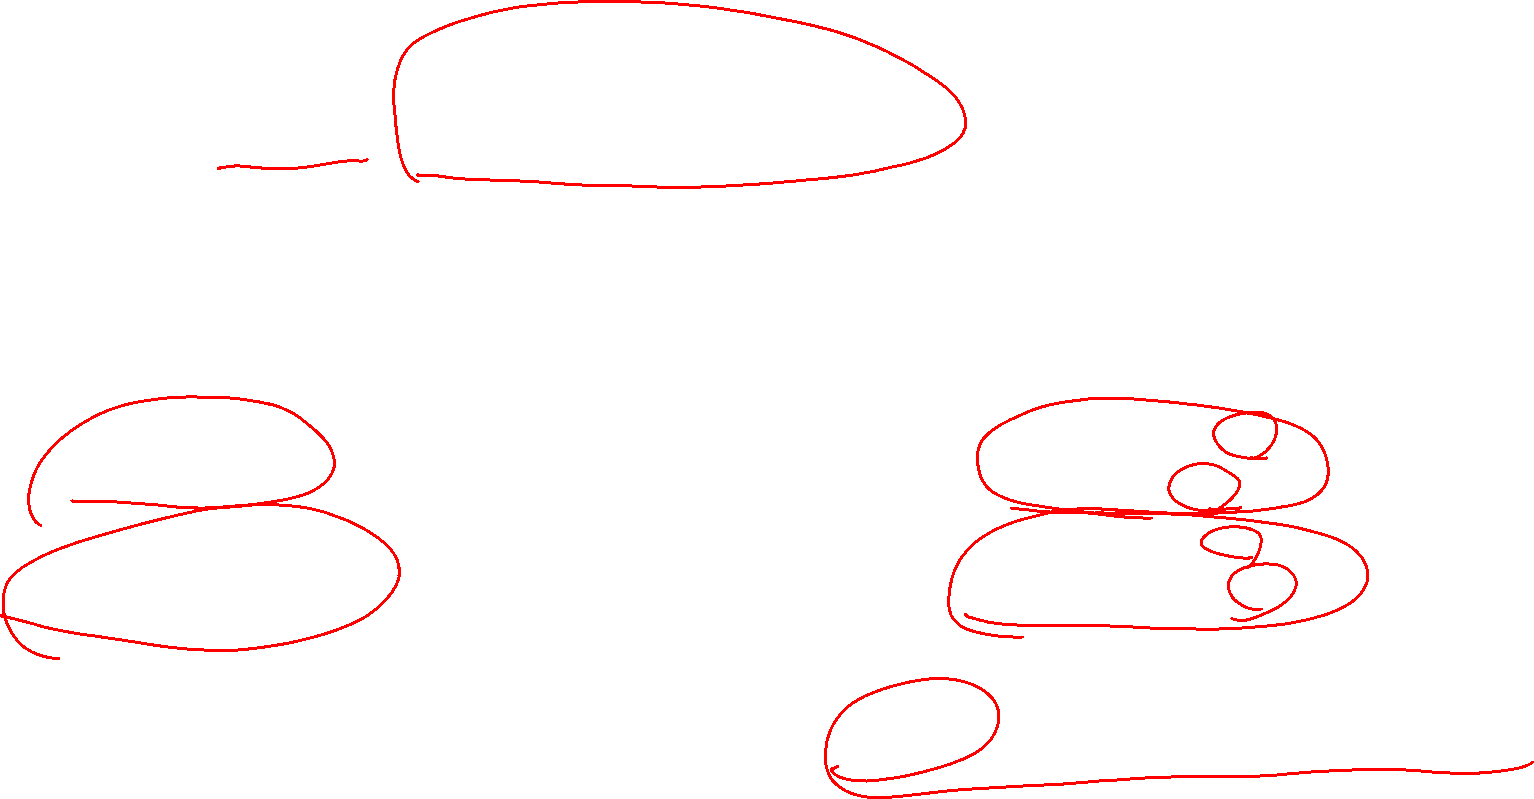
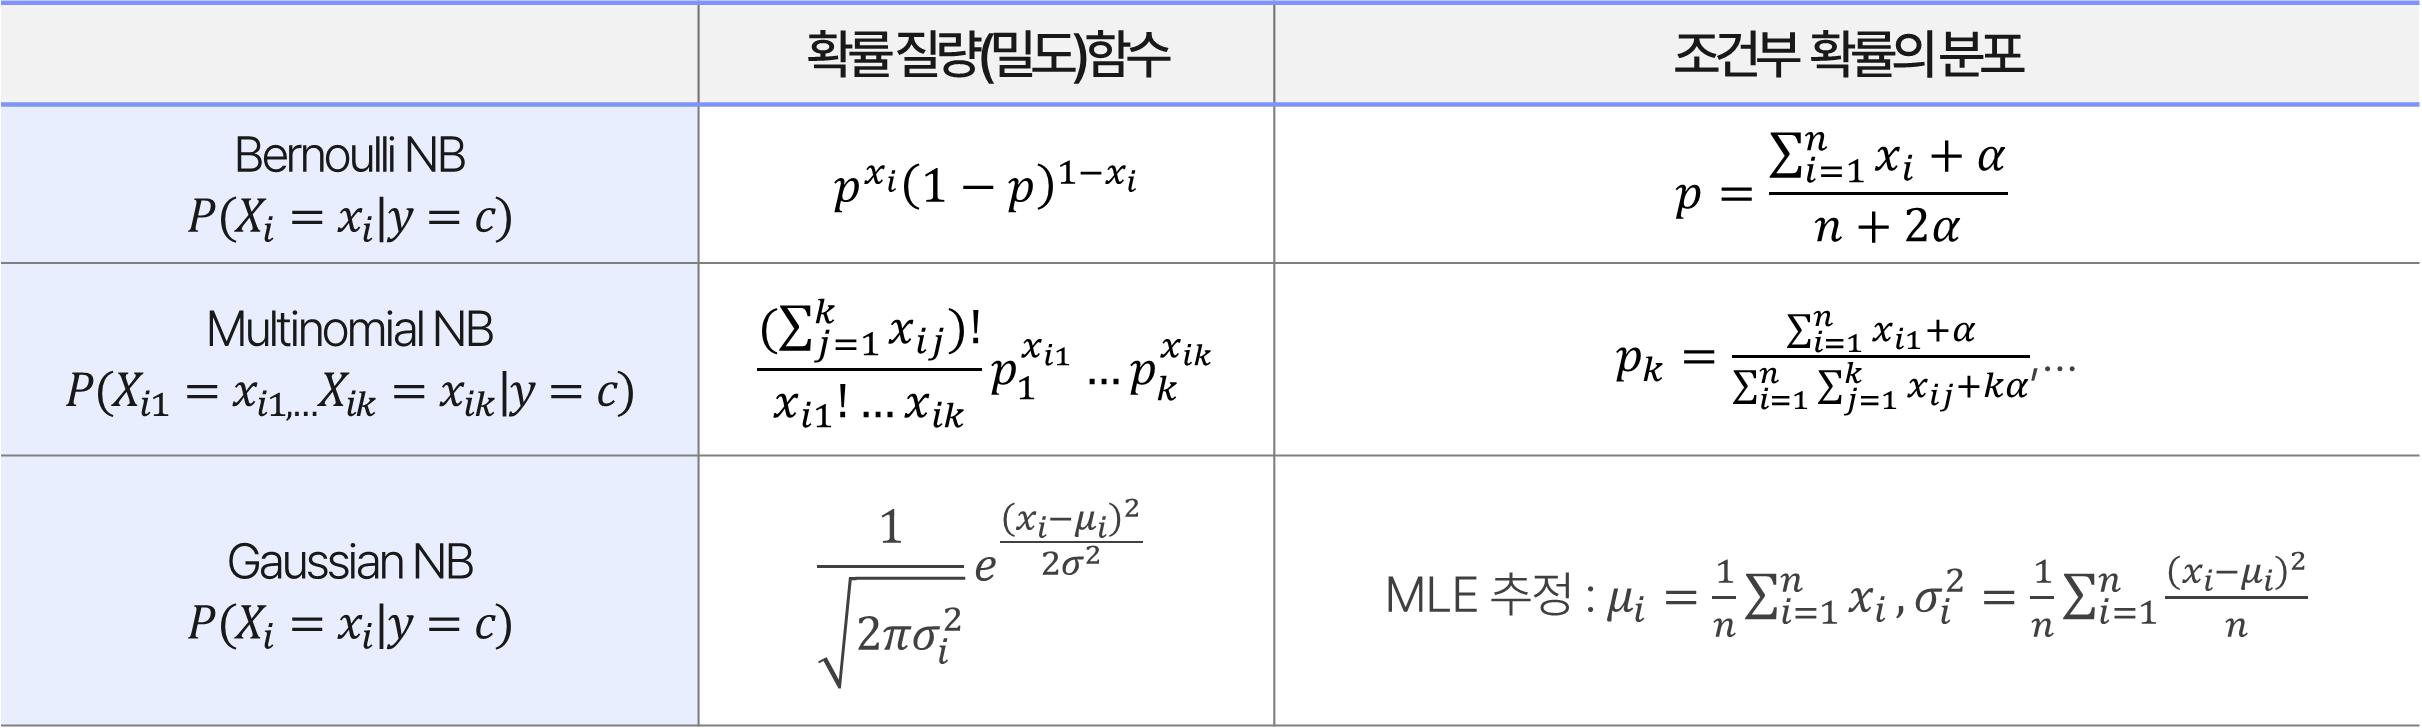


### Slide 18: (Untitled)

- 평활화(Smoothing)
- 나이브 베이즈(Naive Bayes)
- 조건부 확률의 분포
- Bernoulli NB
- Multinomial NB
- 조건부 확률의 분포
- α: 평활화 계수 (α=1 인 경우 Laplace Smoothing, α>0 인 경우 Lidstone Smoothing)
- α
- 편향(Bias)
- 분산(Variance)
- 의미
- 작을수록(α→0)
- 작아짐
- 커짐
- 데이터에 민감
- 클수록(α→1)
- 커짐
- 작아짐
- 보수적 예측
- 미등장일 경우 클래스 확률이 0 이 되는 것을 방지
- 분산과 편향 조절
- 2

**Table 18.1**
|   | 조건부 확률의 분포 |
| --- | --- |
| Bernoulli NB |   |
| Multinomial NB |   |

**Table 18.2**
|   | 조건부 확률의 분포 |
| --- | --- |
|   |   |
|   |   |

**Table 18.3**
| α | 편향(Bias) | 분산(Variance) | 의미 |
| --- | --- | --- | --- |
| 작을수록(α→0) | 작아짐 | 커짐 | 데이터에 민감 |
| 클수록(α→1) | 커짐 | 작아짐 | 보수적 예측 |

**Equation 18.1**
$$
𝑃(𝑋𝑖=𝑥𝑖|𝑦=𝑐)
$$

**Equation 18.2**
$$
𝑝=𝑖=1𝑛𝑥𝑖+𝛼𝑛+2𝛼
$$

**Equation 18.3**
$$
𝑃(𝑋𝑖1=𝑥𝑖1,…𝑋𝑖𝑘=𝑥𝑖𝑘|𝑦=𝑐)
$$

**Equation 18.4**
$$
𝑝1=𝑖=1𝑛𝑥𝑖1+𝛼𝑖=1𝑛𝑗=1𝑘𝑥𝑖𝑗+𝑘𝛼
$$

**Equation 18.5**
$$
𝑃(𝑋𝑖=𝑥𝑖|𝑦=𝑐)
$$

**Equation 18.6**
$$
𝑝=𝑖=1𝑛𝑥𝑖+𝛼𝑛+2𝛼
$$

**Equation 18.7**
$$
𝑃(𝑋𝑖1=𝑥𝑖1,…𝑋𝑖𝑘=𝑥𝑖𝑘|𝑦=𝑐)
$$

**Equation 18.8**
$$
𝑝1=𝑖=1𝑛𝑥𝑖1+𝛼𝑖=1𝑛𝑗=1𝑘𝑥𝑖𝑗+𝑘𝛼
$$

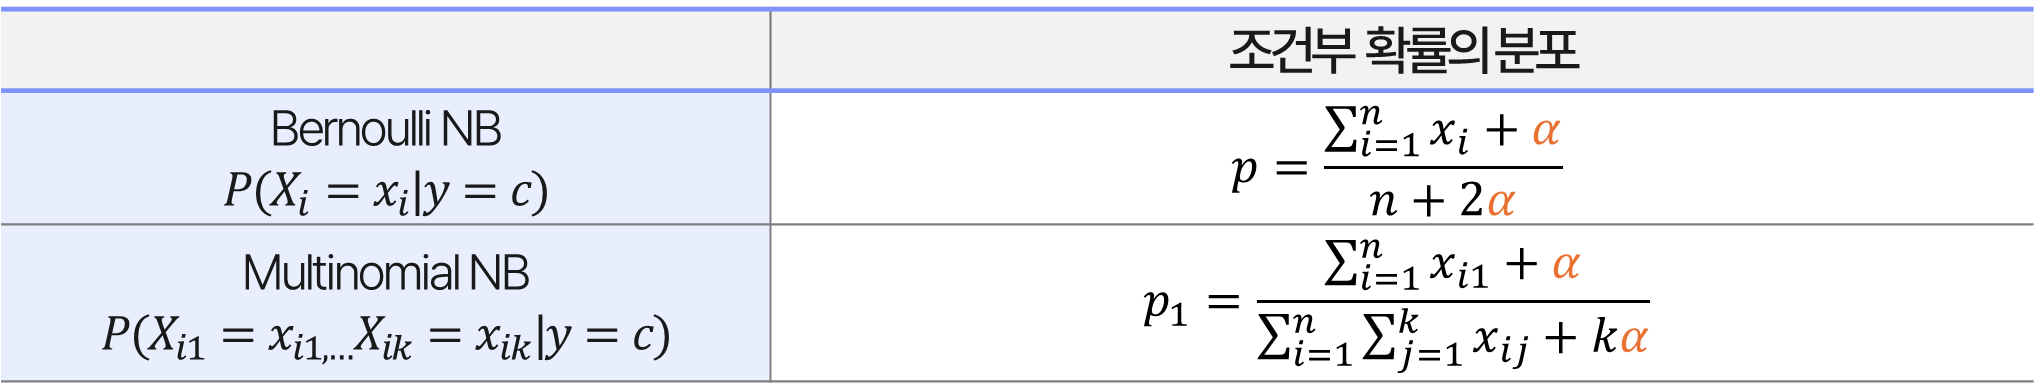
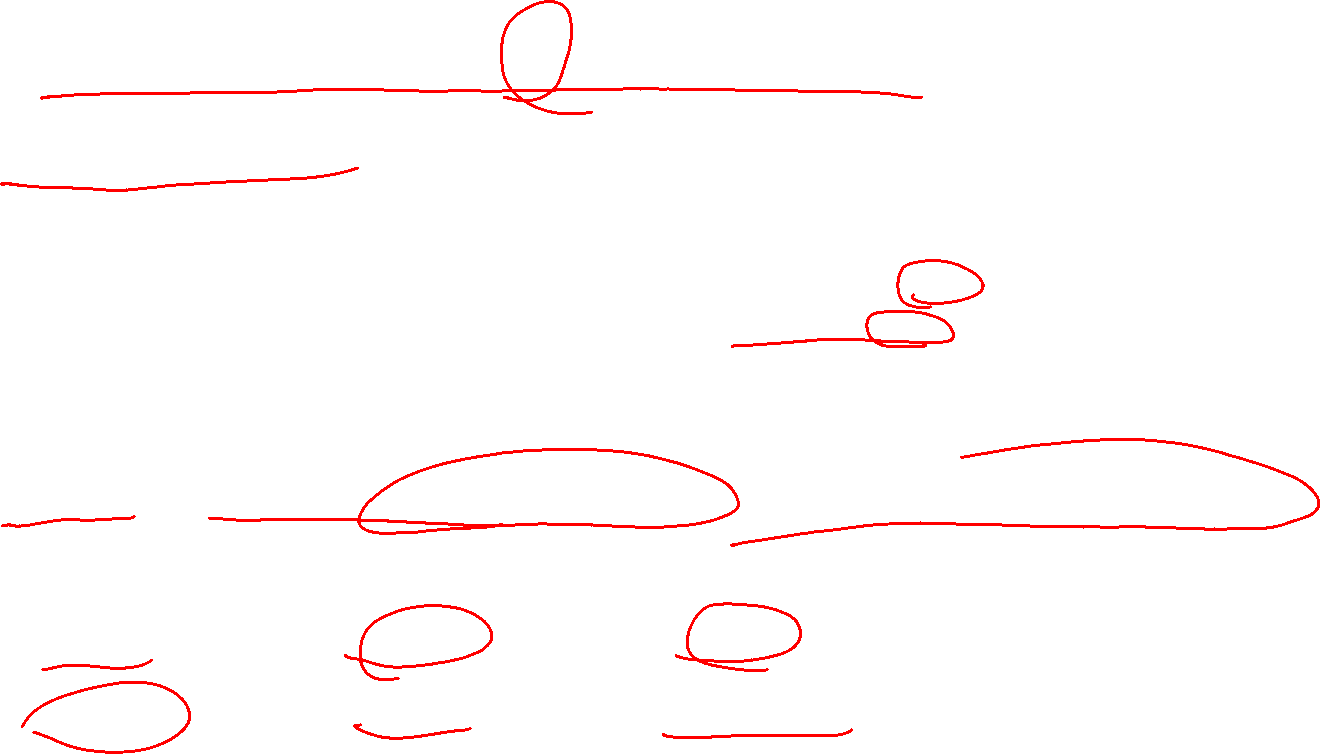


### Slide 19: (Untitled)

- 나이브 베이즈(Naive Bayes)
- 장점
- 단점
- 빠른 학습과 예측
- 적은 데이터로도 잘 작동
- 고차원 데이터에 강함
- 구현이 간단하고 직관적
- 점진적 학습 가능
- 특정 조건에서는 최적
- 분류 기준 해석 용이
- 독립성 가정에 어긋날수록 성능 저하의 여지가 큼
- 모델의 유연성이 낮음
- 연속형+범주형의 혼합이 어려움
- 장단점
- 2

**Table 19.1**
| 장점 | 단점 |
| --- | --- |
| 빠른 학습과 예측
적은 데이터로도 잘 작동
고차원 데이터에 강함
구현이 간단하고 직관적
점진적 학습 가능
특정 조건에서는 최적
분류 기준 해석 용이 | 독립성 가정에 어긋날수록 성능 저하의 여지가 큼
모델의 유연성이 낮음
연속형+범주형의 혼합이 어려움 |

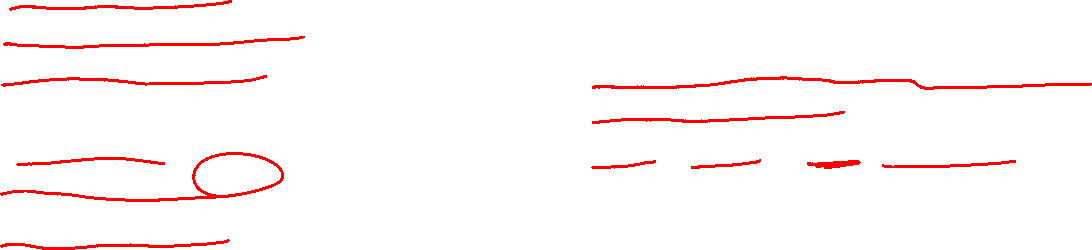


### Slide 20: (Untitled)

- 규제는 모델의 분산을 낮춰 과적합에 대응하기 위해 사용된다.
- 1
- L1 정규화는 일부 가중치를 정확히 0 으로 만들 수 있어 변수 선택 효과를 갖는다.
- 2
- L2 정규화는 큰 가중치를 억제하지만, 가중치 자체를 완전히 0 으로 만들지는 않는다.
- 3
- Ridge 선형회귀 모델은 L1 와 L2 규제 모두 사용한다.
- 4
- Q1. 다음 중 가중치 기반 모델의 규제(Regularization)에 대한 설명으로 잘못된 것은?
- 문제 풀이
- 3


### Slide 21: (Untitled)

- Q1. 다음 중 가중치 기반 모델의 규제(Regularization)에 대한 설명으로 잘못된 것은?
- 문제 풀이
- 3
- L1 와 L2 규제를 모두 사용하는 선형회귀 모델은 Elastic Net 입니다.
- 규제는 모델의 분산을 낮춰 과적합에 대응하기 위해 사용된다.
- 1
- L1 정규화는 일부 가중치를 정확히 0 으로 만들 수 있어 변수 선택 효과를 갖는다.
- 2
- L2 정규화는 큰 가중치를 억제하지만, 가중치 자체를 완전히 0 으로 만들지는 않는다.
- 3
- 4
- Ridge 선형회귀 모델은 L1 와 L2 규제 모두 사용한다.

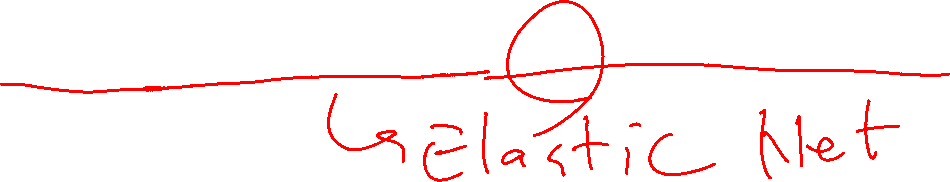


### Slide 22: (Untitled)

- Q2. 다음 중 가중치 기반 모델의 학습 방법에 대한 설명으로 옳지 않은 것은?
- 문제 풀이
- 3
- 1
- 수식 기반 추정은 수식을 통해 가중치를 계산할 수 있어 항상 같은 결과를 도출한다.
- 2
- 경사하강법은 손실 함수의 기울기에 따라 가중치를 반복적으로 조정하는 방식이다.
- 3
- 경사하강법은 전체 학습 데이터의 메모리 탑재가 필요하며 규모가 큰 데이터셋에서는 한계가 있다.
- 4
- 경사하강법의 학습률은 수렴 속도와 예측 성능에 영향을 미친다.


### Slide 23: (Untitled)

- 문제 풀이
- 3
- Q2. 다음 중 가중치 기반 모델의 학습 방법에 대한 설명으로 옳지 않은 것은?
- 경사하강법은 전체 데이터를 메모리에 올리지 않고 나누어 탑재하여 학습이 가능합니다.
- 부분으로 나누어진 데이터를 배치(Batch)라고 하며, 큰 데이터셋에도 적용 가능합니다.
- 1
- 수식 기반 추정은 수식을 통해 가중치를 계산할 수 있어 항상 같은 결과를 도출한다.
- 2
- 경사하강법은 손실 함수의 기울기에 따라 가중치를 반복적으로 조정하는 방식이다.
- 3
- 경사하강법은 전체 학습 데이터의 메모리 탑재가 필요하며 규모가 큰 데이터셋에서는 한계가 있다.
- 4
- 경사하강법의 학습률은 수렴 속도와 예측 성능에 영향을 미친다.

slide23-image1


### Slide 24: (Untitled)

- Q3. 나이브 베이즈 분류기(Naive Bayes classifier)에 대한 설명으로 옳지 않은 것은 무엇인가?
- 문제 풀이
- 3
- 나이브 베이즈는 조건부 확률을 기반으로 작동하며, 베이즈 정리를 활용한다.
- 1
- 입력 특성 간에 상관 관계가 높을수록 강인한 성능을 갖는다.
- 2
- 평활화 계수를 통해 모델의 분산과 편향을 조정할 수 있다.
- 3
- 계산이 빠르고 적은 데이터로도 비교적 좋은 성능을 낼 수 있다.
- 4


### Slide 25: (Untitled)

- 문제 풀이
- 3
- Q3. 나이브 베이즈 분류기(Naive Bayes classifier)에 대한 설명으로 옳지 않은 것은 무엇인가?
- 나이브 베이즈 분류기는 입력 특성 간 독립을 가정하고 있으며
- 이 가정에 어긋날수록 강인하게 동작하지 못합니다.
- 나이브 베이즈는 조건부 확률을 기반으로 작동하며, 베이즈 정리를 활용한다.
- 1
- 2
- 입력 특성 간에 상관 관계가 높을수록 강인한 성능을 갖는다.
- 평활화 계수를 통해 모델의 분산과 편향을 조정할 수 있다.
- 3
- 계산이 빠르고 적은 데이터로도 비교적 좋은 성능을 낼 수 있다.
- 4

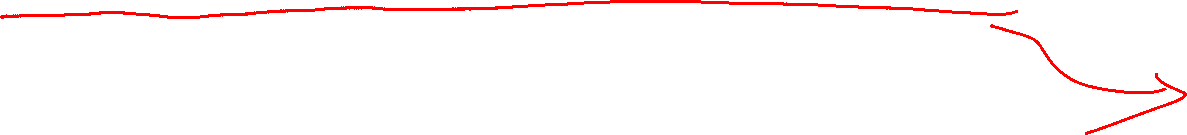


### Slide 26: (Untitled)

- # 가중치 기반 모델
- # 규제
- # 나이브 베이즈
- # 평활화
- 추후 디자인하여 PSD 로 편집될 영역입니다.
